# Studi Kasus Adaline (Perbandingan Kecepatan Training Perceptron dan Adaline)

Setelah membuat sistem klasifikasi data iris menggunakan Perceptron, anda diminta mengembangkan sistem tersebut dengan menggunakan Adaline.

In [81]:
from google.colab import files

files.upload()

Saving iris.csv to iris (3).csv


{'iris (3).csv': b'sepal.length,sepal.width,petal.length,petal.width,variety\r\n7,3.2,4.7,1.4,Versicolor\r\n6.4,3.2,4.5,1.5,Versicolor\r\n6.9,3.1,4.9,1.5,Versicolor\r\n5.5,2.3,4,1.3,Versicolor\r\n6.5,2.8,4.6,1.5,Versicolor\r\n5.7,2.8,4.5,1.3,Versicolor\r\n6.3,3.3,4.7,1.6,Versicolor\r\n4.9,2.4,3.3,1,Versicolor\r\n6.6,2.9,4.6,1.3,Versicolor\r\n5.2,2.7,3.9,1.4,Versicolor\r\n5,2,3.5,1,Versicolor\r\n5.9,3,4.2,1.5,Versicolor\r\n6,2.2,4,1,Versicolor\r\n6.1,2.9,4.7,1.4,Versicolor\r\n5.6,2.9,3.6,1.3,Versicolor\r\n6.7,3.1,4.4,1.4,Versicolor\r\n5.6,3,4.5,1.5,Versicolor\r\n5.8,2.7,4.1,1,Versicolor\r\n6.2,2.2,4.5,1.5,Versicolor\r\n5.6,2.5,3.9,1.1,Versicolor\r\n5.9,3.2,4.8,1.8,Versicolor\r\n6.1,2.8,4,1.3,Versicolor\r\n6.3,2.5,4.9,1.5,Versicolor\r\n6.1,2.8,4.7,1.2,Versicolor\r\n6.4,2.9,4.3,1.3,Versicolor\r\n6.6,3,4.4,1.4,Versicolor\r\n6.8,2.8,4.8,1.4,Versicolor\r\n6.7,3,5,1.7,Versicolor\r\n6,2.9,4.5,1.5,Versicolor\r\n5.7,2.6,3.5,1,Versicolor\r\n5.5,2.4,3.8,1.1,Versicolor\r\n5.5,2.4,3.7,1,Versicolor\r

# Data Loading & Basic Analysis

In [82]:
import numpy as np
import pandas as pd

df = pd.read_csv('iris.csv')

In [83]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,7.0,3.2,4.7,1.4,Versicolor
1,6.4,3.2,4.5,1.5,Versicolor
2,6.9,3.1,4.9,1.5,Versicolor
3,5.5,2.3,4.0,1.3,Versicolor
4,6.5,2.8,4.6,1.5,Versicolor


In [84]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,7.0,3.2,4.7,1.4,Versicolor
1,6.4,3.2,4.5,1.5,Versicolor
2,6.9,3.1,4.9,1.5,Versicolor
3,5.5,2.3,4.0,1.3,Versicolor
4,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,Virginica
96,6.3,2.5,5.0,1.9,Virginica
97,6.5,3.0,5.2,2.0,Virginica
98,6.2,3.4,5.4,2.3,Virginica


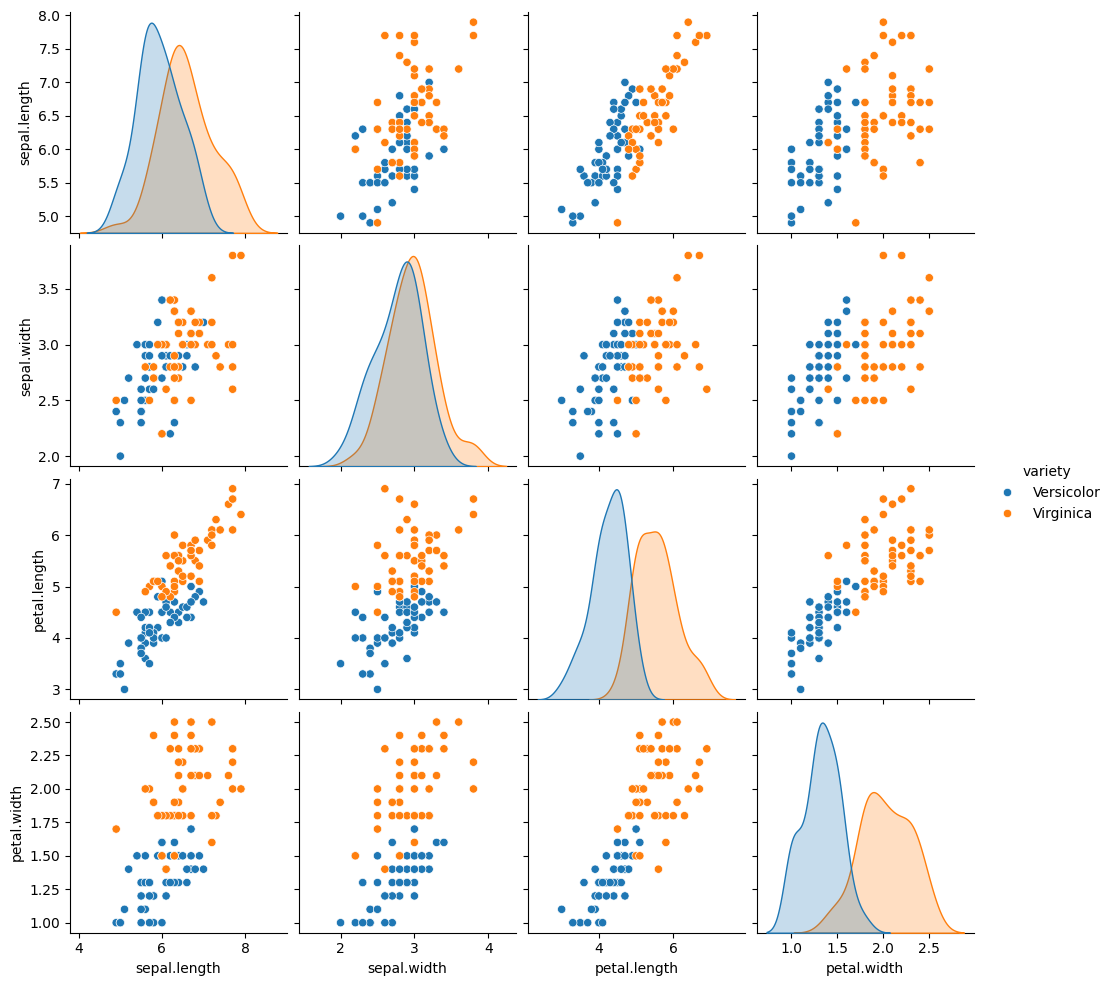

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='variety')

In [86]:
from sklearn.model_selection import train_test_split

X = df.drop('variety', axis=1)
X = X.to_numpy()
y = df['variety'].to_numpy()
c = {'Virginica': -1, 'Versicolor': 1}
y = [c[i] for i in y]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Implementasi Adaline

Dari data diatas, buatlah sebuah model Adaline untuk mengklasifikasikan dataset iris. Untuk pengujian perceptron dapat menggunakan dari studi kasus sebelumnya.

###Adaline


In [87]:
#Plotting

import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

In [88]:
# Step Bipolar
def bipstep(y, th=0):
    return 1 if y >= th else -1



In [89]:
#Training

import sys
def adaline_fit(x, t, alpha=.1, max_err=.1, max_epoch=-1, verbose=False, draw=False):
    w = np.random.uniform(0, 1, len(x[0]) + 1)
    b = np.ones((len(x), 1))
    x = np.hstack((b, x))
    stop = False
    epoch = 0
    while not stop and (max_epoch == -1 or epoch < max_epoch):
        epoch += 1
        max_ch = -sys.maxsize
        if verbose:
            print('\nEpoch', epoch)
        for r, row in enumerate(x):
            y = np.dot(row, w)
            for i in range(len(row)):
                w_new = w[i] + alpha * (t[r] - y) * row[i]
                max_ch = max(abs(w[i] - w_new), max_ch)
                w[i] = w_new
            if verbose:
                print('Bobot:', w)
            if draw:
                plot(line(w), x, t)
        stop = max_ch < max_err
    return w, epoch

In [90]:
#Testing

def adaline_predict(X, w):
    Y = []
    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = bipstep(y_in)
        Y.append(y)
    return Y

###Perceptron

In [91]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plotPercep(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

In [92]:
# Percep step

def percep_step(input, th=0):
  return 1 if input > th else -1 if input < -th else 0

In [93]:
#Training

def percep_fit(X, target, th=0, a=0, max_epoch=-1, verbose=False, draw=False):
  w = np.zeros(len(X[0]) + 1)
  bias = np.ones((len(X), 1))
  X = np.hstack((bias, X))
  stop = False
  epoch = 0

  while not stop and (max_epoch == -1 or epoch < max_epoch):
    stop = True
    epoch += 1

    if verbose:
      print('\nEpoch', epoch)
    for r, row in enumerate(X):
      y_in = np.dot(row, w)
      y = percep_step(y_in, th)

      if y != target[r]:
        stop = False
        w = [w[i] + a * target[r] * row[i] for i in range(len(row))]

      if verbose:
        print('Bobot:', w)
      if draw:
        plotPercep(line(w, th), line(w, -th), X, target)

  return w, epoch

In [94]:
#Testing

def percep_predict(X, w, th=0):
  Y = []

  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = percep_step(y_in, th)

    Y.append(y)
  return Y

In [95]:
#Hitung Akurasi

def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
    return sum(s) / len(a)

###Testing

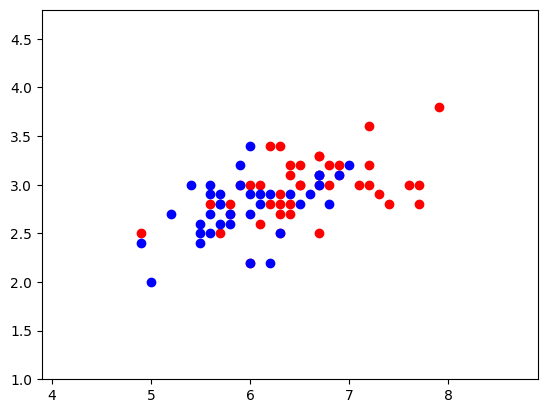

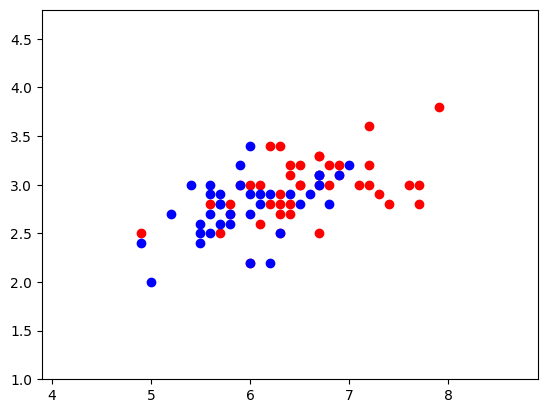

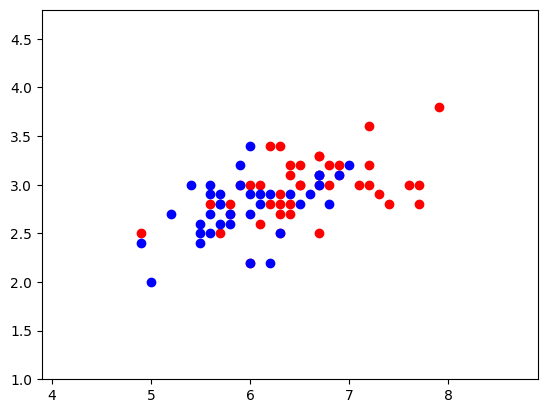

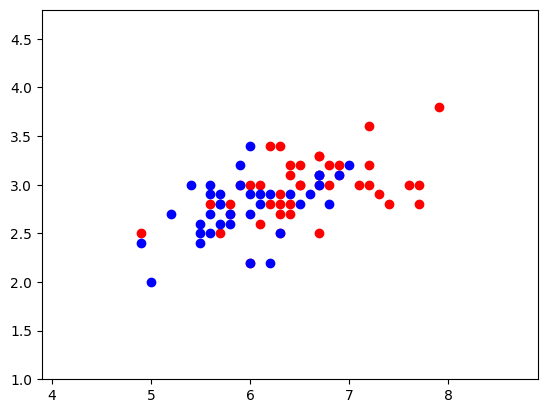

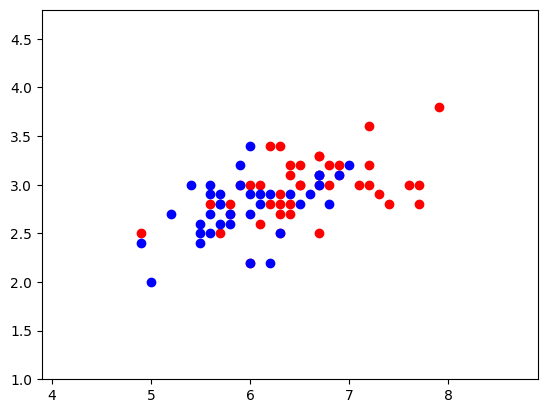

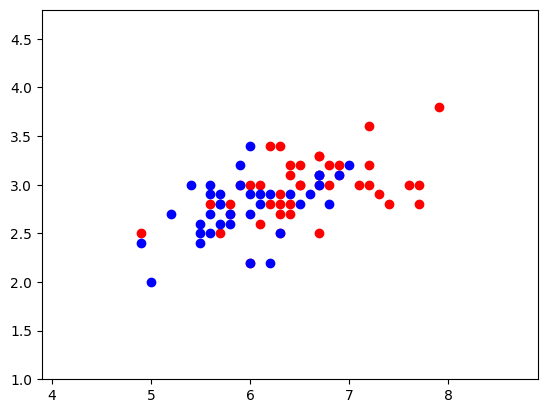

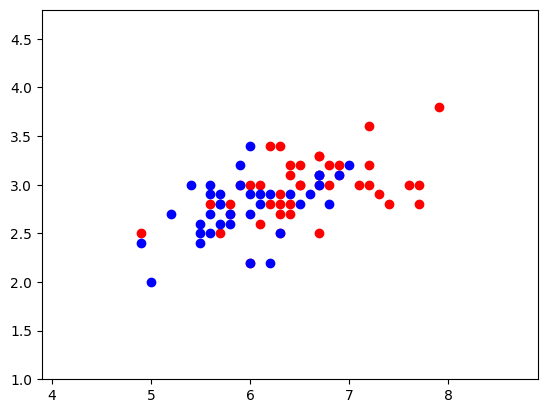

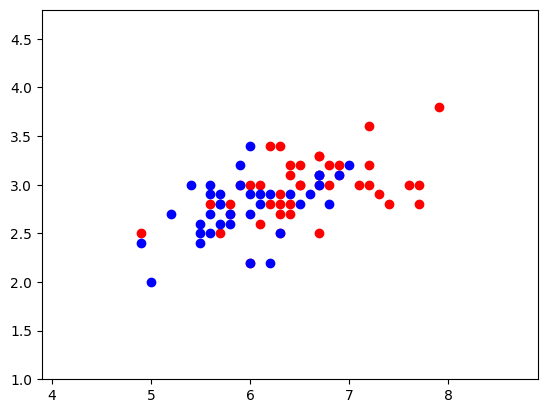

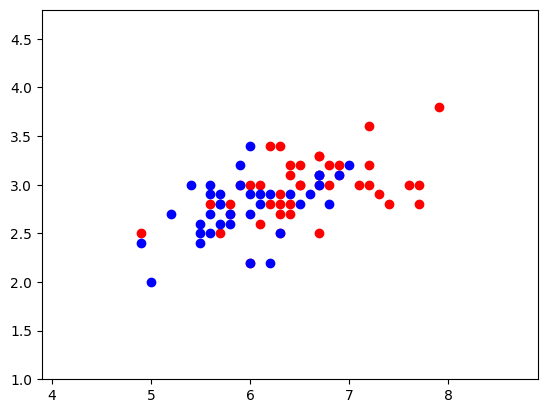

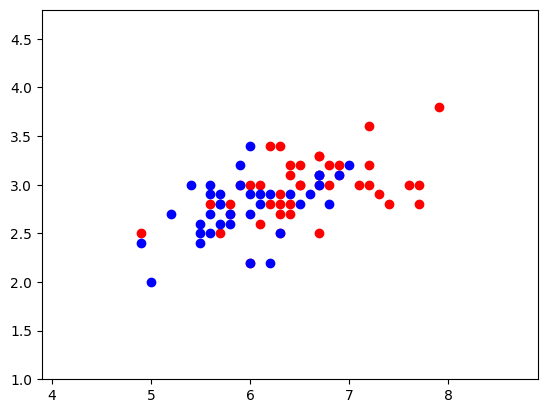

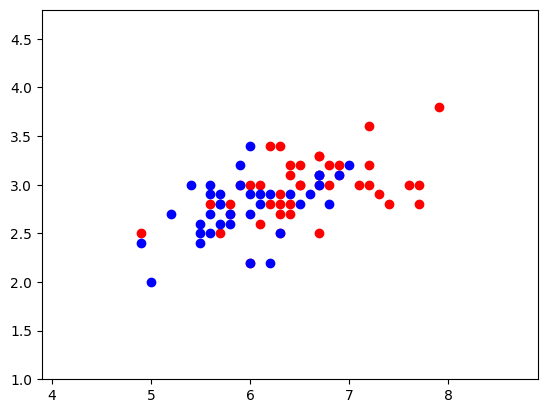

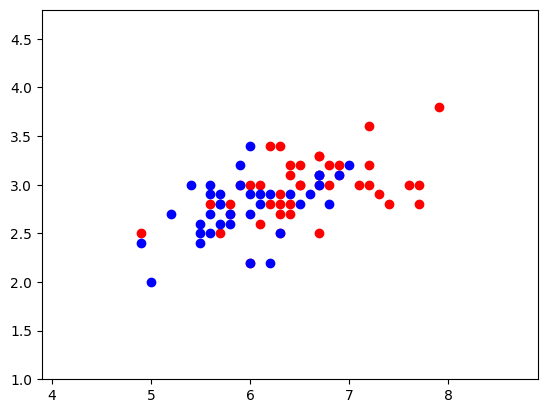

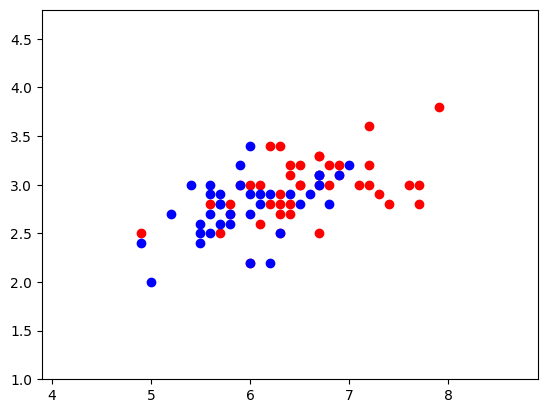

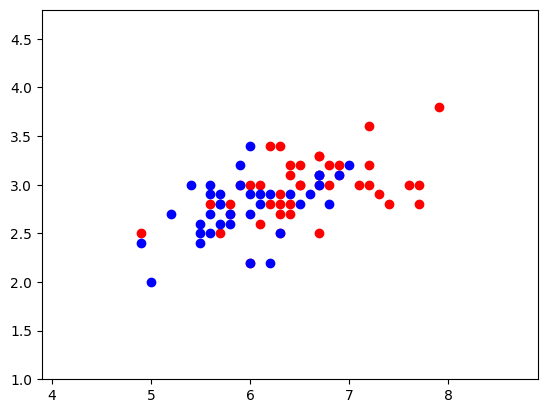

KeyboardInterrupt: 

In [96]:
#Testing Adaline

a = 0.1
max_epoch = 1000
th = 0.2


w, epoch = adaline_fit(X_train, y_train, th, a, max_epoch, verbose=False, draw=True)
out = adaline_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)

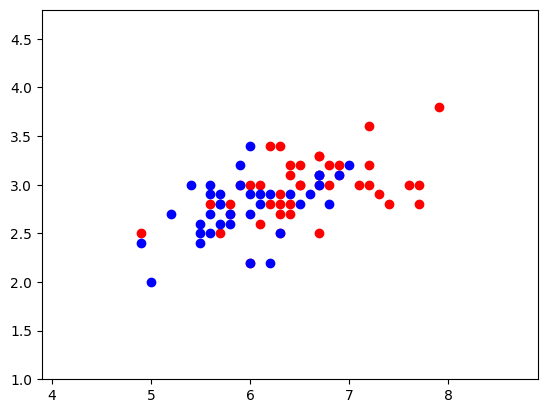

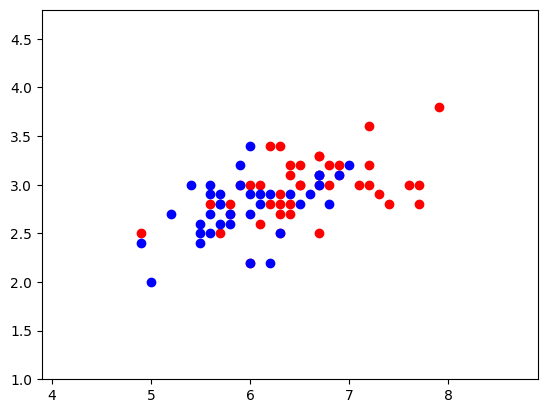

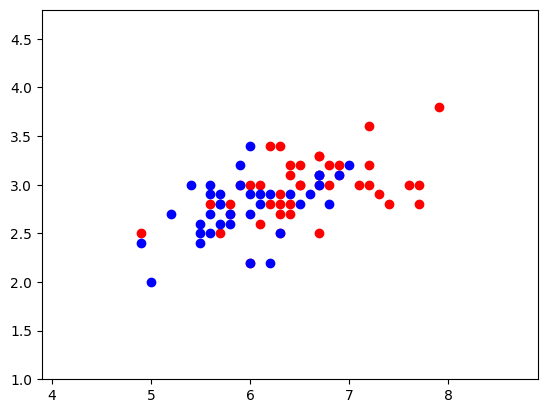

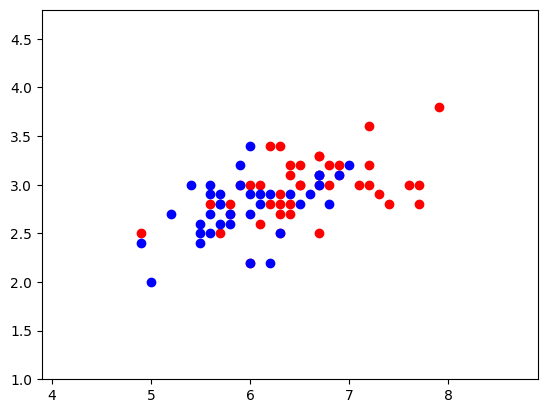

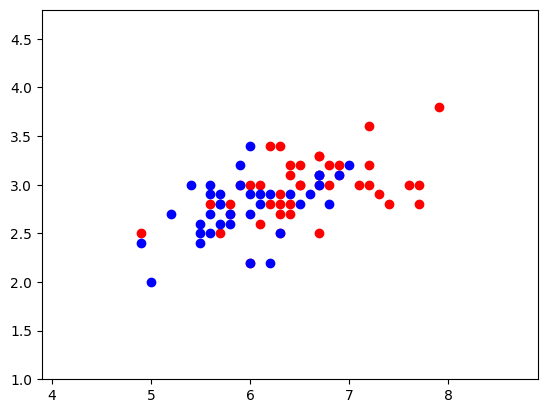

KeyboardInterrupt: 

In [97]:
#Testing Perceptron

th = 0.2
a = 0.1
max_epoch = 1000


w, epoch = percep_fit(X_train, y_train, th, a, max_epoch, verbose=False, draw=True)
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)

## Analisis

1. Dari hasil plotting diatas, apakah menurut anda dataset iris dengan 2 kelas yang diberikan merupakan permasalahan yang *linearly-separable*?

2. Dengan nilai learning rate yang sama, ujikan dan bandingkan akurasi dan loss pada Adaline dan Perceptron pada epoch nilai epoch rendah dan tinggi.

3. Dari hasil perbandingan diatas, model mana yang memiliki performa yang lebih baik dan mengapa?

4. Apakah ada kekurangan dari strategi training Adaline yang mengubah bobot pada setiap data meskipun klasifikasi benar?

JAWABAN

1. Tidak, dataset tersebut merupakan permasalahan yang tidak linearly separable. Karena pada dataset iris, terdapat beberapa data yang overlapping, sehingga garis lurus tidak akan bisa memisahkan data tersebut.

2. Untuk nilai akurasi Adaline pada epoch yang lebih rendah (50 epoch), hasil akurasi tetap 35%, karena sebenarnya pada epoch ke 5 adaline sudah tidak bisa menghitung sehingga hasil angkanya mencapai NAN. Sedangkan untuk nilai akurasi Perceptron pada epoch yang lebih rendah (50 epoch), hasil akurasi menurun menjadi 95% dibandingkan dengan 1000 epoch yang memiliki akurasi 100% atau overfitting.

3. Perceptron memiliki performa yang lebih baik, namun terdapat overfitting pada data Train. Hal tersebut dikarenakan pembagian dataset pada data Train kebetulan berisi data yang tidak overlapping sehingga bisa dipisahkan dengan garis lurus. Namun apabila pembagian dataset diubah menjadi random, maka nilai akurasi Perceptron akan menurun tetapi dari segi performa tetap lebih bagus Perceptron dibandingkan dengan adaline.

4. Karena proses dari adaline itu sendiri mengubah bobot sesuai dengan error sehingga saat bobot sudah semakin kecil, menyebabkan overfitting pada proses training.

In [101]:
#Kode untuk nomer 2

#Testing Adaline

a = 0.1
max_epoch = 50
th = 0.2


w, epoch = adaline_fit(X_train, y_train, th, a, max_epoch, verbose=False, draw=False)
out = adaline_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)


Epochs: 50
Accuracy: 0.35


<ipython-input-89-ebb0fed9d546>:18: RuntimeWarning: invalid value encountered in scalar add
  w_new = w[i] + alpha * (t[r] - y) * row[i]


In [100]:

#Testing Perceptron

th = 0.2
a = 0.1
max_epoch = 50


w, epoch = percep_fit(X_train, y_train, th, a, max_epoch, verbose=False, draw=False)
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)

Epochs: 50
Accuracy: 0.95
